# Algerian Forest Fires Dataset Project EDA Part


## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps


## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index


## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report**

**3. Exploratory Data Analysis (EDA) on all Features**


In [56]:
from warnings import filterwarnings
filterwarnings('ignore')

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [58]:
dataset = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/algerian%2Bforest%2Bfires%2Bdataset/Algerian_forest_fires_dataset_UPDATE.csv')

In [59]:
dataset.shape

(246, 14)

In [60]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Dataset Cleaning

In [61]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index,
we can make a new column based on the Region

 **1 : "Bejaia Region Dataset"**

 **2 : "Sidi-Bel Abbes Region Dataset"**

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


* Looks like all the features are  identified as object but can be converted into numeric, if we remove rows which has strings.

**Add new column with region**

In [63]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [64]:
df.head(122)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0.0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0.0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0.0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0


In [65]:
df.tail(122)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


## Checking the Null Values in the Dataset

In [66]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [67]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [68]:
df = df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [69]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [70]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [71]:
#remove 122th column
df = df.drop(122).reset_index(drop=True)

In [72]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [73]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [74]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

----------------------

**Changing the required columns as integer data type**

In [75]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.6+ KB


## Changing the other Columns to Float

In [77]:
obj = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [78]:
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [79]:
for i in obj:
    if i != 'Classes':
        df[i] = df[i].astype(float)
    

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [81]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [82]:
## Save the cleaned Dataset to newcsv file 
df.to_csv('Algerian_forest_fire_cleaned_dataset',index=False)

In [83]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [98]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


# Exploratory Data Analysis

In [84]:
df_copy = df.drop(['day', 'month', 'year'],axis=1)

In [85]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [86]:
df_copy["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [87]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [88]:
#df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [89]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

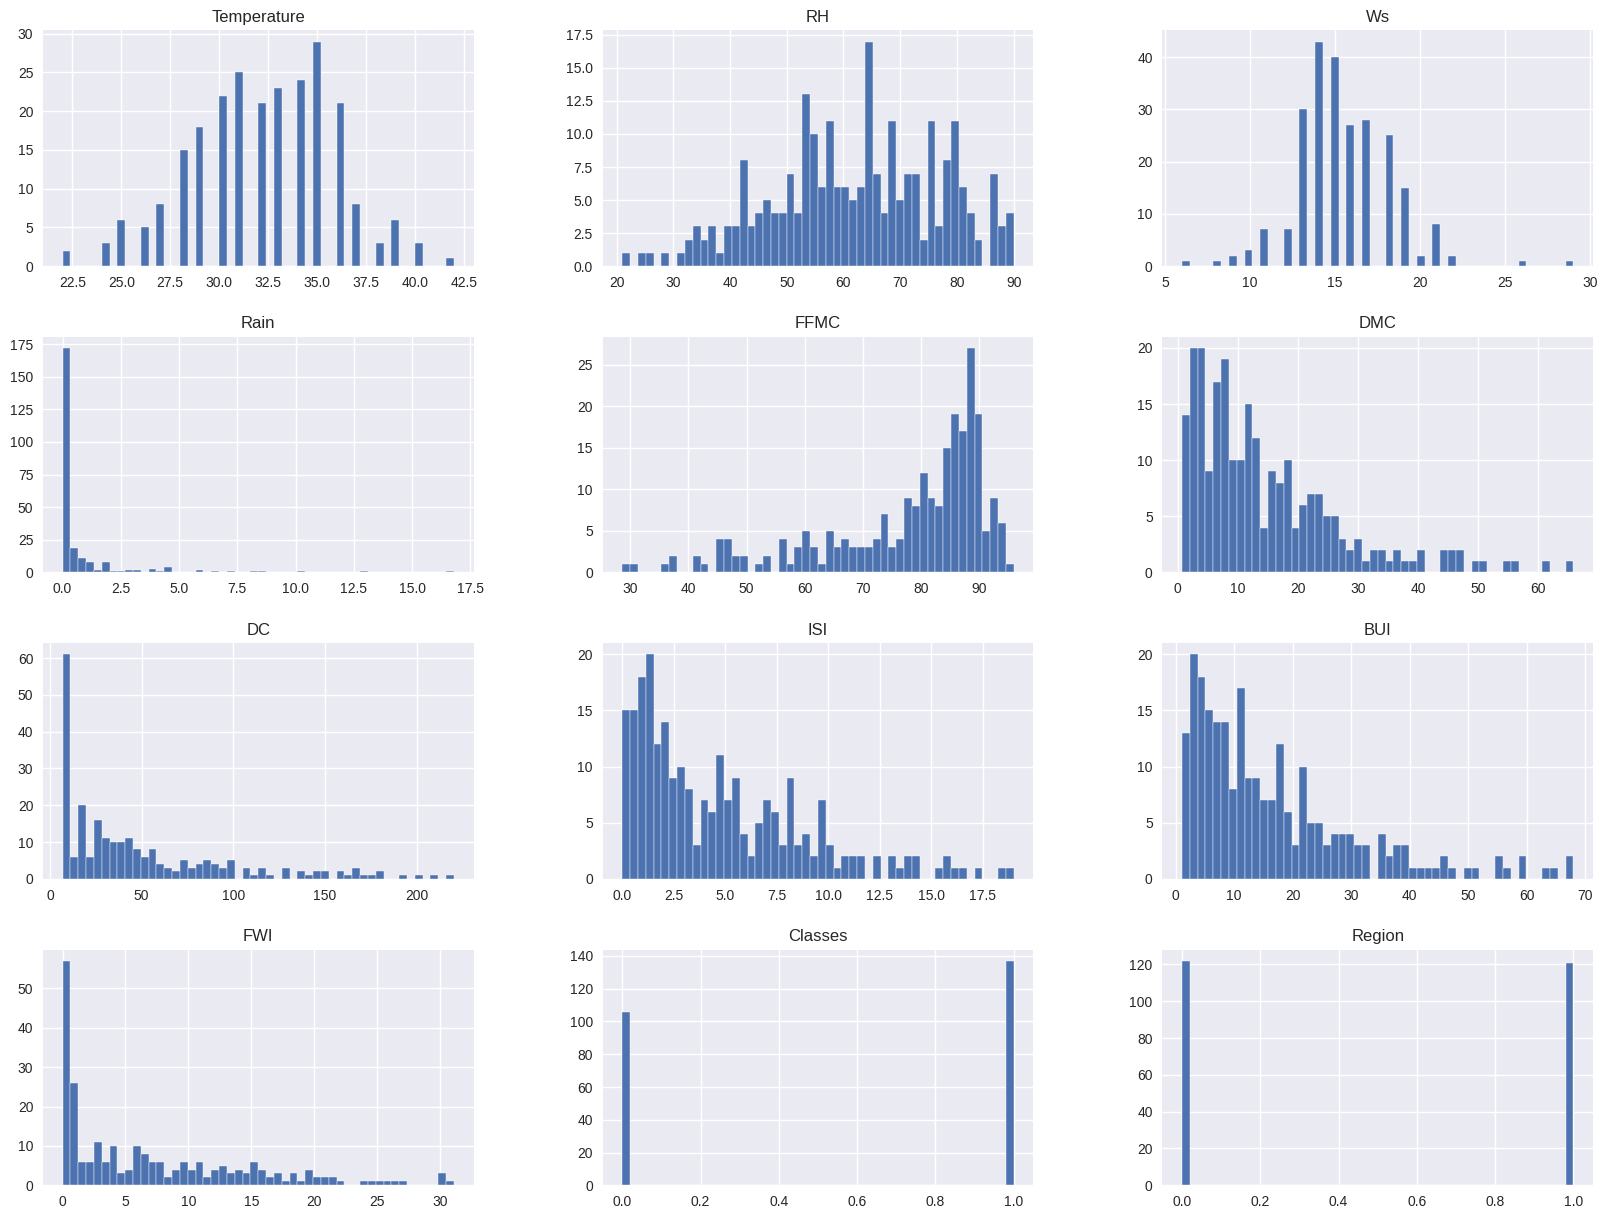

In [90]:
# plot Destiny Plot For All the Features

plt.style.use('seaborn')
df_copy.hist(bins= 50 , figsize=(20,15))
plt.show()

In [91]:
## Percentage for Pie Chart 

per = df_copy['Classes'].value_counts(normalize=True) *100

In [92]:
per

1    56.378601
0    43.621399
Name: Classes, dtype: float64

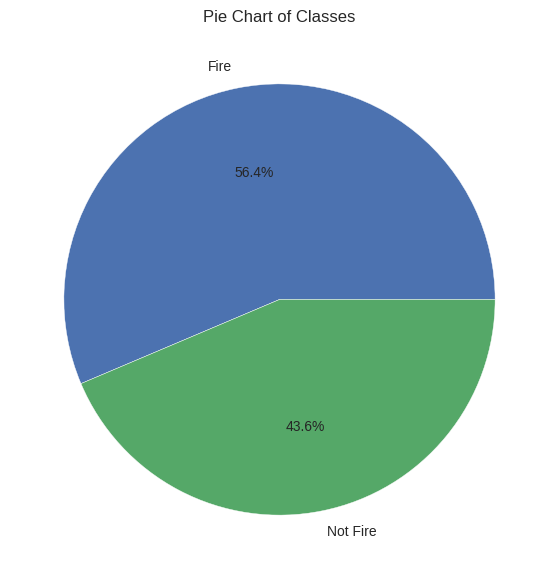

In [93]:
## Plotting the Pie Chart

lab = ["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(per, labels=lab, autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [94]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


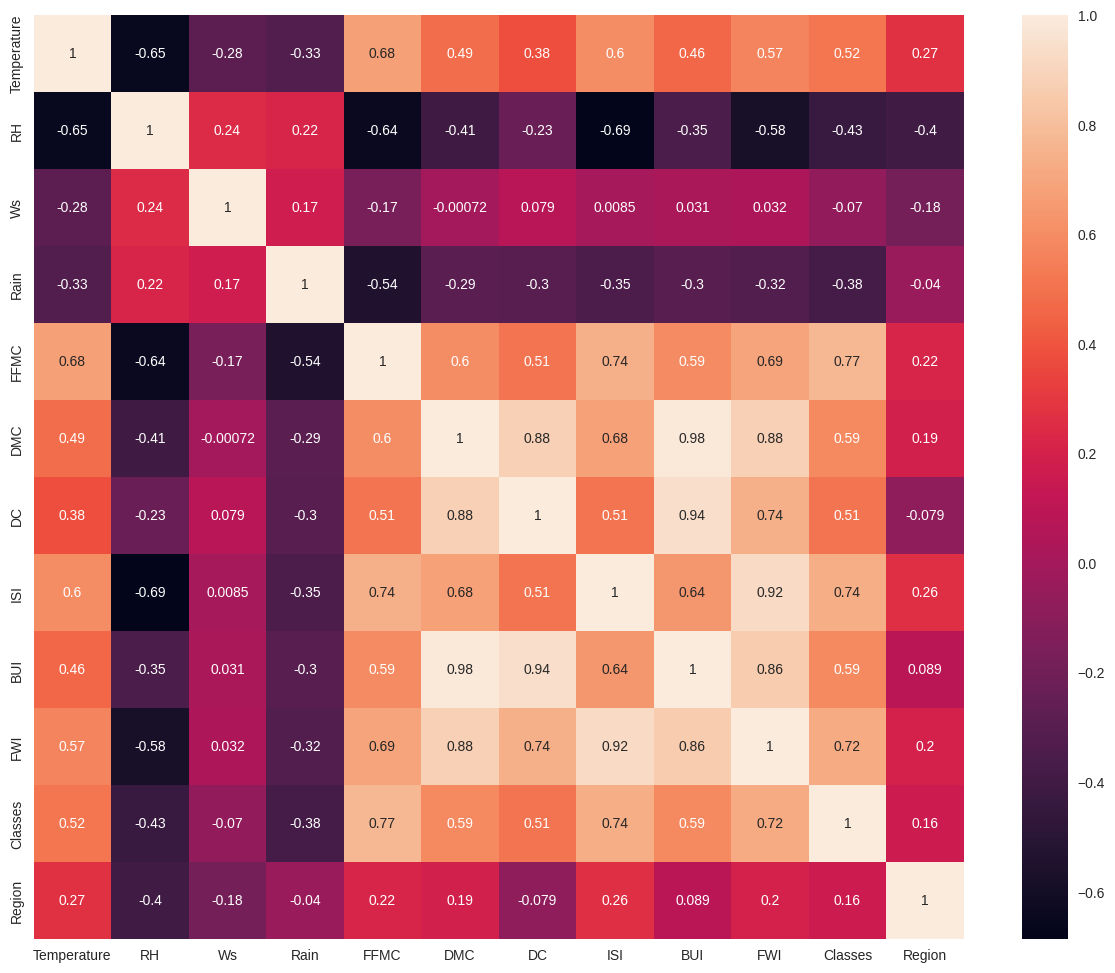

In [95]:
plt.figure(figsize=(15,12))
sns.heatmap(data=df_copy.corr(),annot=True)
plt.show()

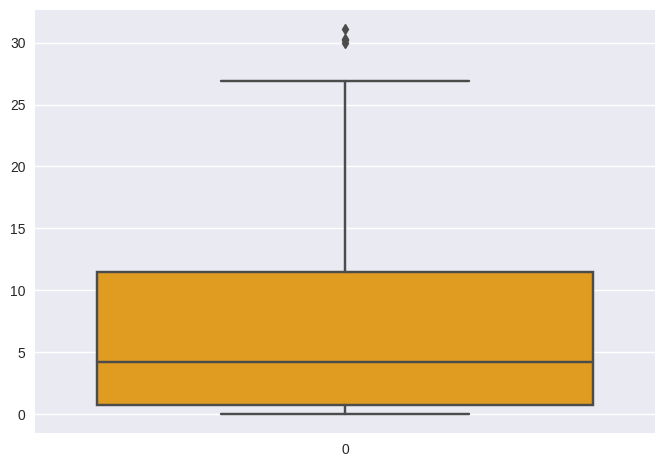

In [96]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'orange')

### **Monthwise Fire Analysis**

In [100]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not Fire','fire')

In [101]:
df['Classes'].value_counts()

fire        137
not Fire    106
Name: Classes, dtype: int64

**1 : "Bejaia Region Dataset"**

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

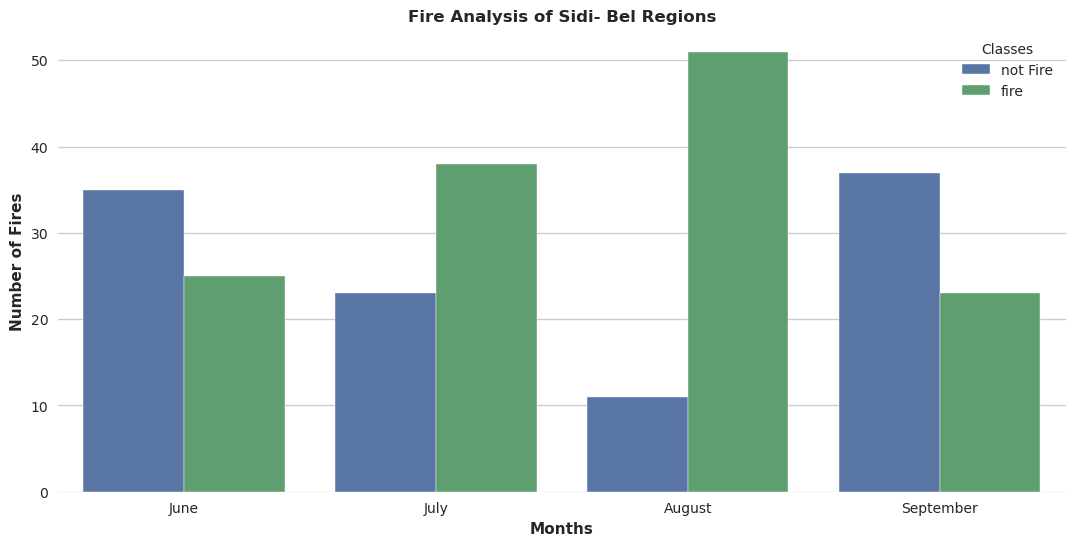

In [106]:
## Monthly Fire Analysis

temp = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x='month',hue='Classes',data=df)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.show()

**2 : "Sidi-Bel Abbes Region Dataset"**

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

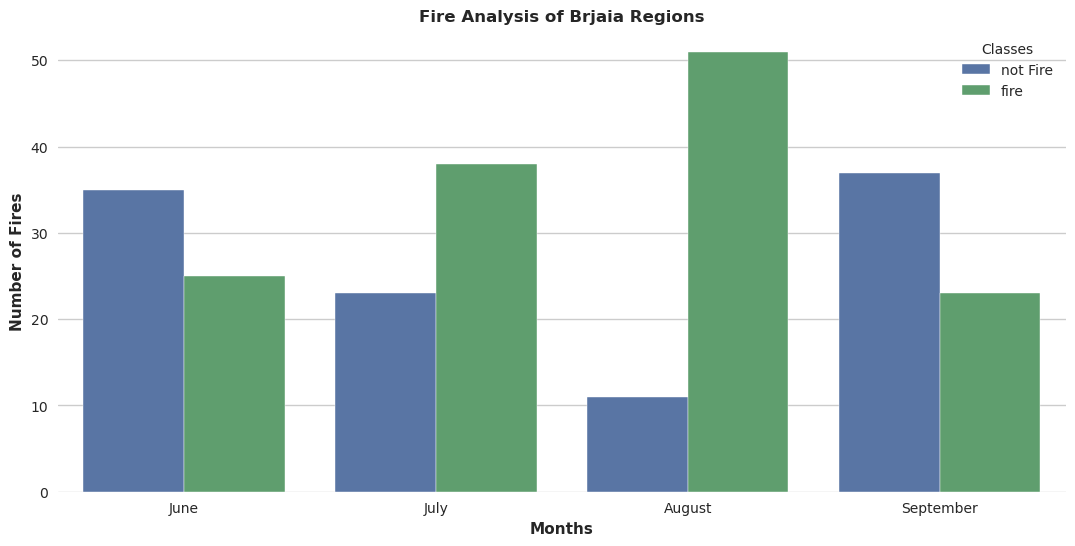

In [108]:
## Monthly Fire Analysis

dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

- Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

- Most of the fires happened in August and very high Fires happened in only 3 months - **June, July and August.**

- Less Fires was on September

## 3.5 Exploratory Data Analysis (EDA) on all Features

In [110]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [119]:
df_copy.groupby(['Rain'], as_index=False)['Classes'].sum()

,Rain,Classes
0,0.0,114
1,0.1,9
2,0.2,3
3,0.3,4
4,0.4,1
5,0.5,2
6,0.6,2
7,0.7,0
8,0.8,0
9,0.9,0


In [125]:
def barchart(feature, xlabel):
    plt.figure(figsize=(14,8))
    by_feature = df_copy.groupby([feature], as_index=False)['Classes'].sum()
    sns.barplot(x=feature, y='Classes', data=by_feature[[feature,'Classes']],estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')
    

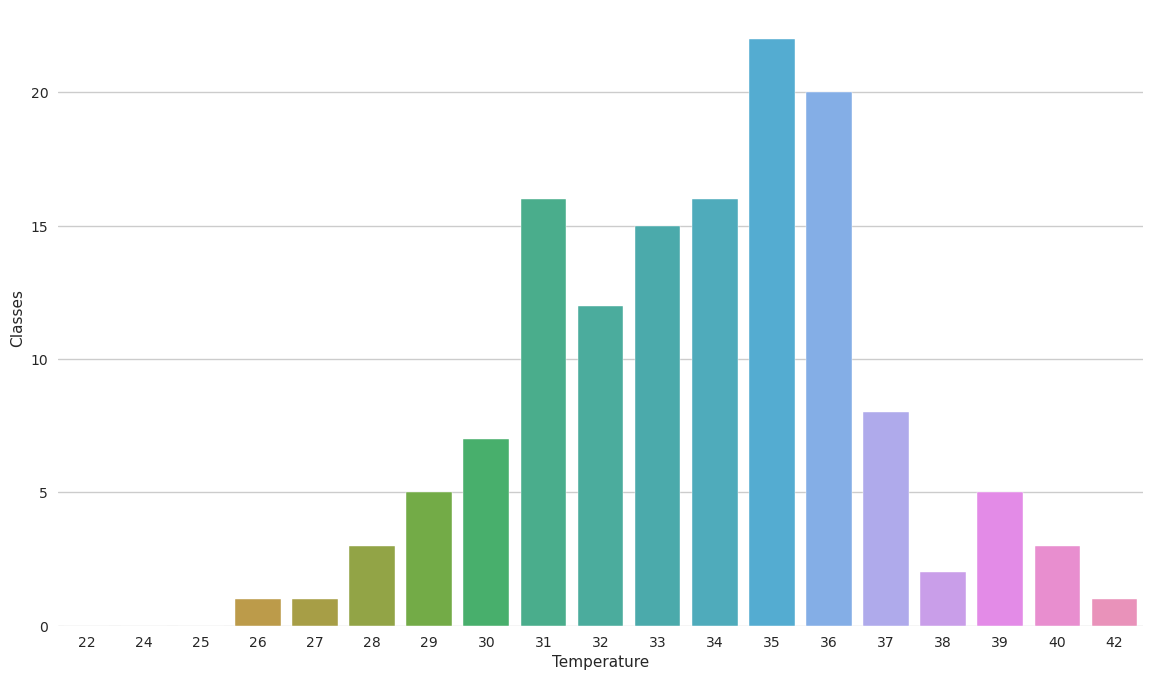

In [126]:
barchart('Temperature','Temperature Max in Celsius degrees')

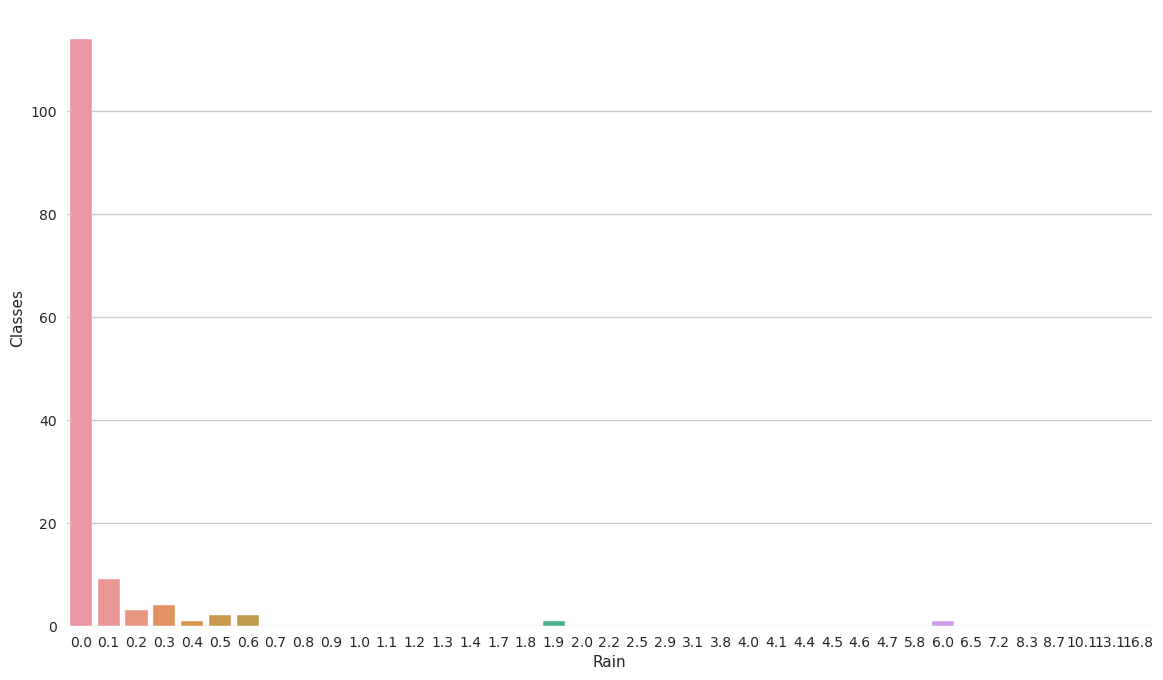

In [127]:
barchart('Rain','Rain in x')

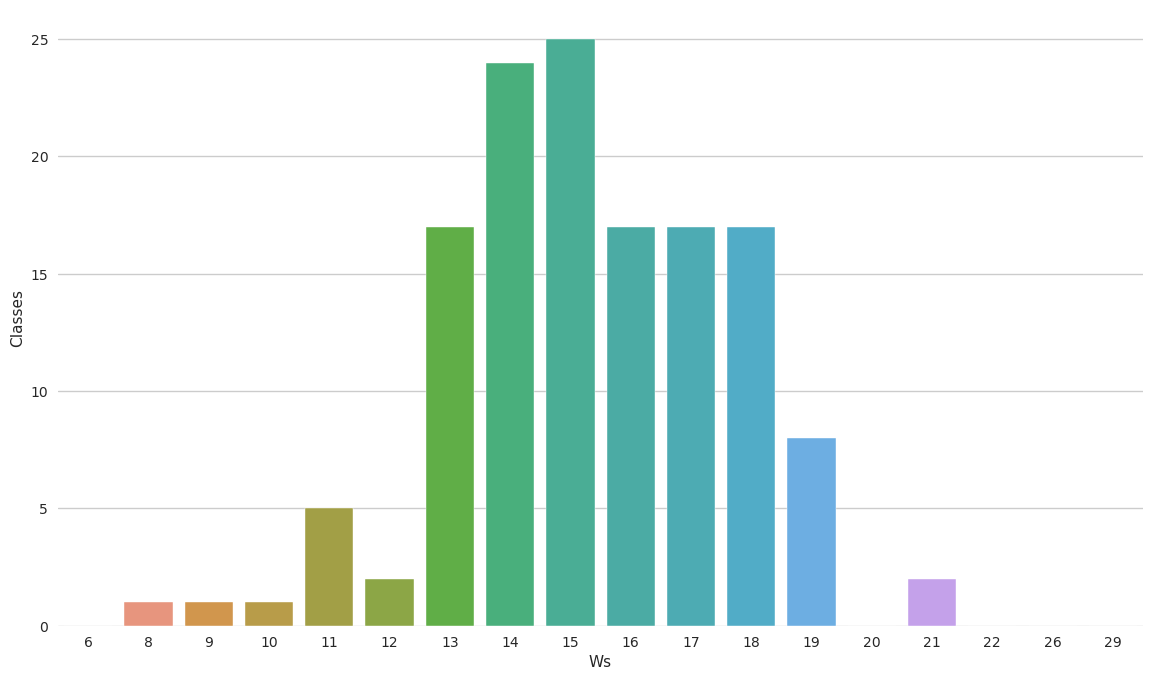

In [128]:
barchart('Ws', 'Wind Speed in km/hr')

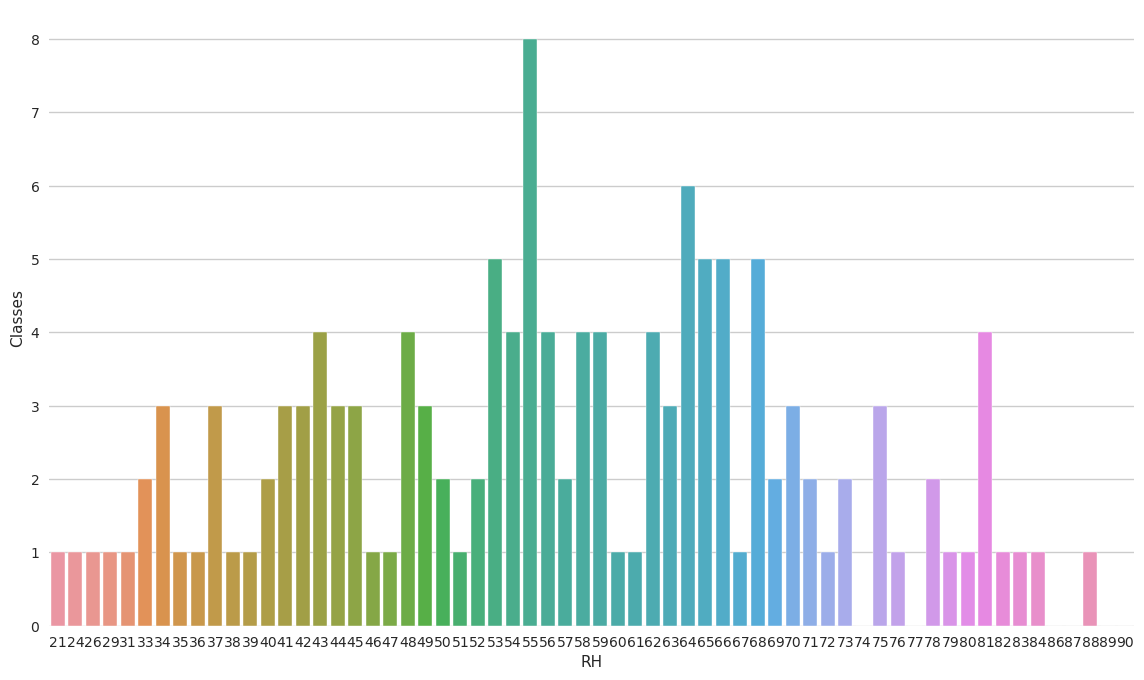

In [130]:
barchart('RH','Relative Humidity in %')

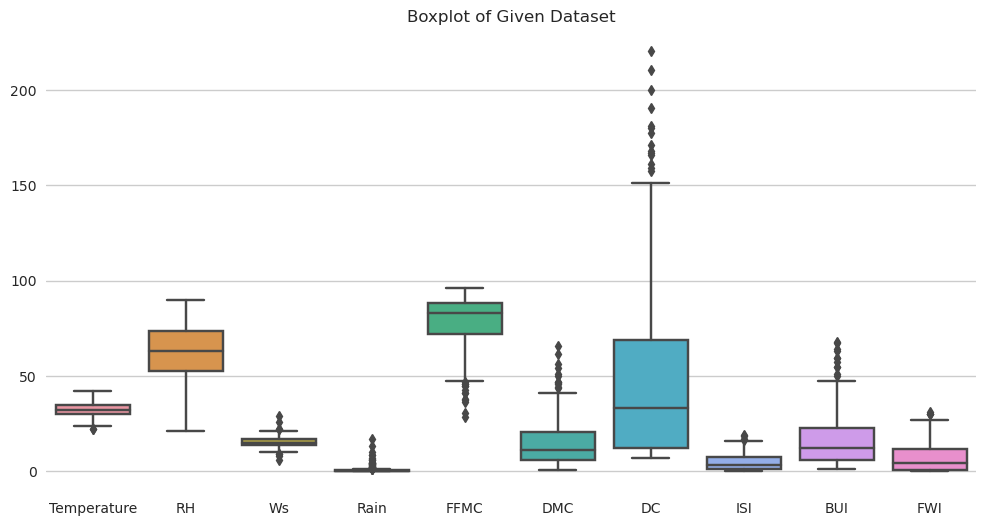

In [138]:
temp = df_copy.drop(['Classes','Region'],axis=1)
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=temp)
plt.title("Boxplot of Given Dataset")
plt.show()

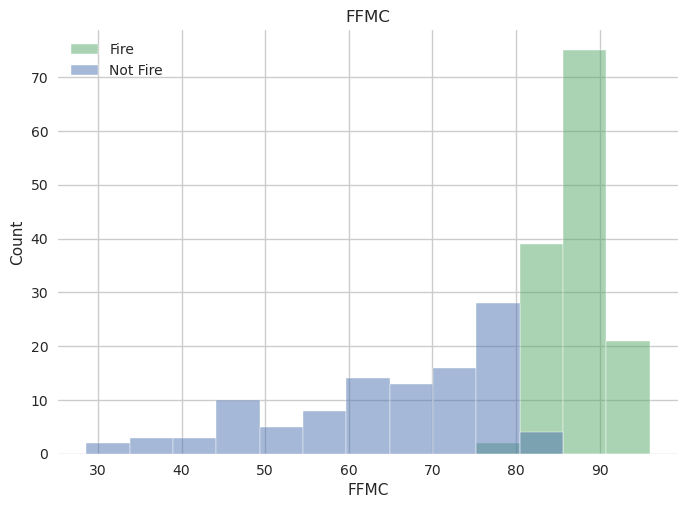

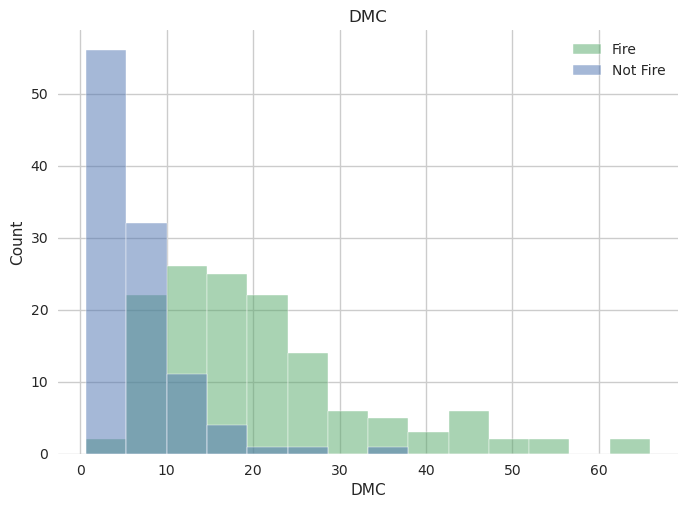

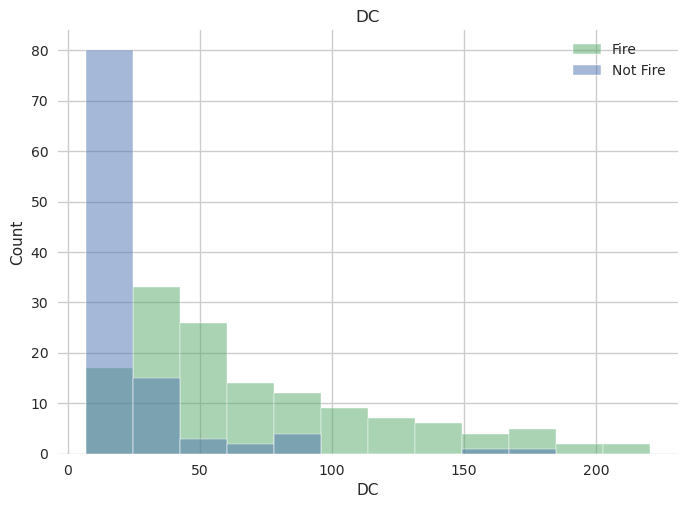

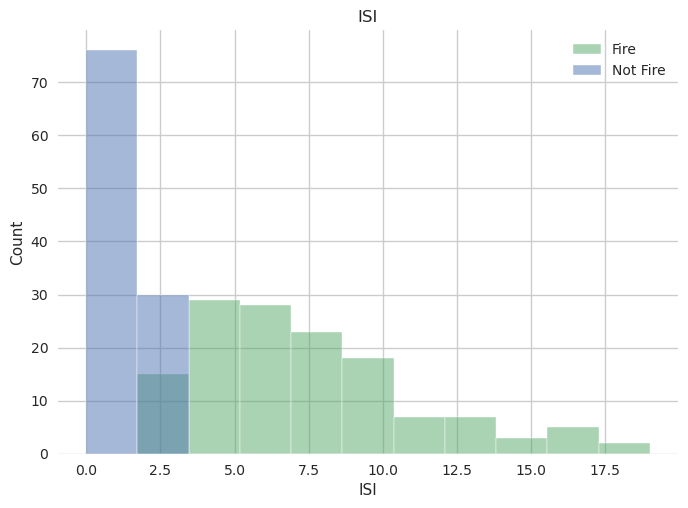

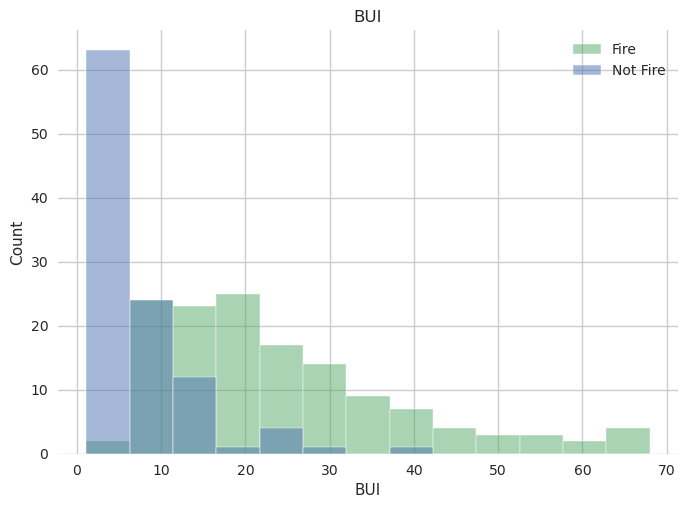

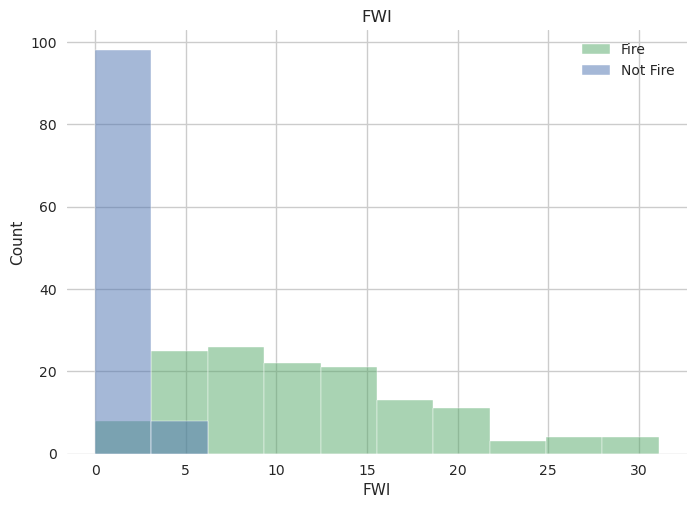

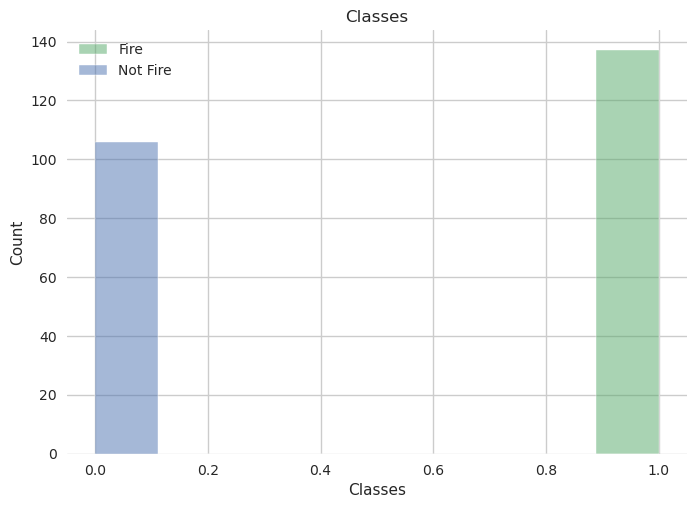

In [140]:
temp1 = df_copy.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in temp1:
    sns.histplot(data=temp1,x=feature,hue='Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

### REPORT
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*,
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*,
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*,
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*,
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*,
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*,
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.